In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.config import get_dataset_and_user

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get data
X, user = get_dataset_and_user('sdss_Q1.1')
labels = 

NameError: name 'labels' is not defined

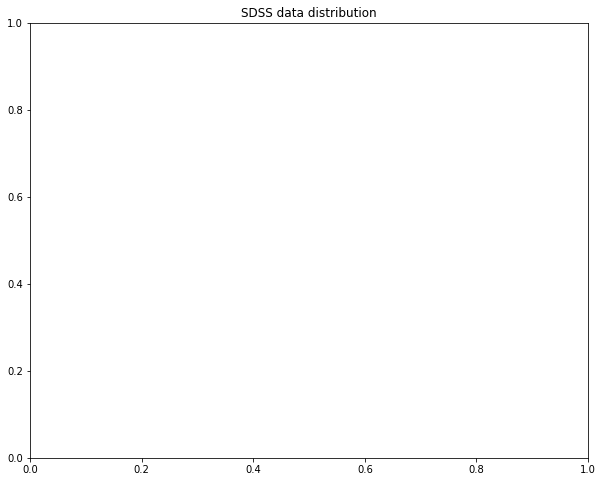

In [4]:
plt.figure(figsize=(10,8))
plt.title("SDSS data distribution")
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=list(map(lambda x: 'r' if x == 1 else 'b', labels)), s=0.1)
plt.show()

In [ ]:
from time import time
from src.user import DummyUser
from src.initial_sampling import FixedSizeStratifiedSampler
from src.showdown import Showdown
from src.plotting import plot_showdown

from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.agnostic import RandomLearner
from src.version_space.two_dimensional import Circle
from src.version_space import SVMVersionSpace


# AL list
active_learners_list = [
     ("random", RandomLearner(LinearSVC(C=200, fit_intercept=False))),
     ("simpleMargin", SimpleMargin(kind='linear', C=5000, fit_intercept=False)),
     #("solver", SolverMethod(kind='linear', pool_size=50, C=5000, fit_intercept=False)),
     #("optimalMargin_10", OptimalMargin(C=200, fit_intercept=False, chain_length=10)),
     ("optimalMargin_50", OptimalMargin(C=200, fit_intercept=False, chain_length=50)),
     #("optimalMargin_500", OptimalMargin(C=200, fit_intercept=False, chain_length=500)),
     #("optimalMargin_1000", OptimalMargin(C=200, fit_intercept=False, chain_length=1000))
]


# datasets
datasets_list = [("sdss_test", X, user)]

# set showdown and run
times = 1
initial_sampler = FixedSizeStratifiedSampler(sample_size=2)

t0 = time()
showdown = Showdown(times, initial_sampler)
output = showdown.run(datasets_list, active_learners_list)
print("Running time per run (in minutes):", (time() - t0)/(60*times))

# plot results
#print(output.head())
plot_showdown(output, times, metrics_list=['fscore', 'iteration_time'])

In [ ]:
np.all(np.dot(np.array([1,2,3]), np.array([1,2,3]).T) <= 0, axis=-1)